In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# Here we have to get the input parameter as "Annual_Income" and "Spending_Score" we are going to cluster it.
# Here We dont want to Split as X_train ans y_train. But Instead we go with "X" only
# go only with one variable
x = dataset.iloc[:, [3,4]].values #iloc means We can spot the columns with the respective position/index.
#Iloc = Column wise selection[:, [3,4]] or [:, 3:5]
# :,: => for all rows, and all columns
# If we leave it as empty instead of putting columns (:) It will consider it as an empty irrespective of row/columns.
# if the code is like [:,[3, 4]] means We should take only 3rd and 4th column

In [5]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [7]:
from sklearn.cluster import Birch
# Initialize BIRCH
birch_model = Birch(n_clusters=5)   # We can specify number of clusters or leave it None
labels = birch_model.fit_predict(x)
# Get cluster centers directly from the model
cluster_centers = birch_model.subcluster_centers_

# If you want only the final cluster centroids (when n_clusters is set)
if hasattr(birch_model, "cluster_centers_"):
    cluster_centers = birch_model.cluster_centers_

C:\Anaconda3\envs\AIML\lib\site-packages\sklearn\utils\validation.py:179: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [8]:
cluster_centers

array([[ 15.        ,  81.        ],
       [ 16.        ,  77.        ],
       [ 17.        ,  76.        ],
       [ 18.        ,  94.        ],
       [ 19.        ,  72.        ],
       [ 19.        ,  99.        ],
       [ 20.        ,  77.        ],
       [ 20.        ,  79.        ],
       [ 21.        ,  66.        ],
       [ 23.        ,  98.        ],
       [ 24.5       ,  73.        ],
       [ 28.        ,  82.        ],
       [ 28.        ,  61.        ],
       [ 29.        ,  87.        ],
       [ 30.        ,  73.        ],
       [ 33.        ,  92.        ],
       [ 33.        ,  81.        ],
       [ 34.        ,  73.        ],
       [ 37.        ,  75.        ],
       [ 38.        ,  92.        ],
       [ 39.        ,  61.        ],
       [ 39.        ,  65.        ],
       [ 40.        ,  55.        ],
       [ 42.5       ,  60.        ],
       [ 46.        ,  55.5       ],
       [ 47.66666667,  59.        ],
       [ 49.        ,  55.        ],
 

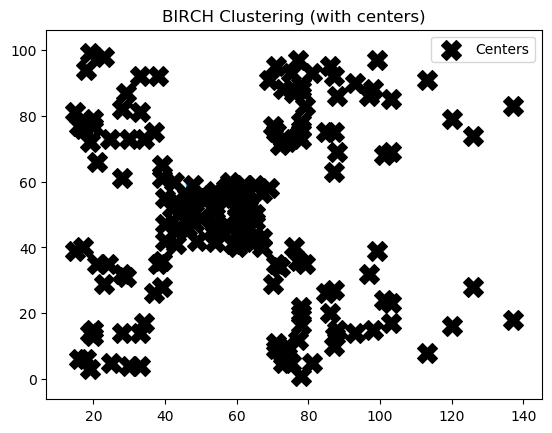

In [9]:
# Visualization
plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='rainbow', s=30)

# Plot BIRCH cluster centers
if cluster_centers is not None and len(cluster_centers) > 0:
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
                color='black', marker='X', s=200, label='Centers')

plt.title("BIRCH Clustering (with centers)")
plt.legend()
plt.show()

In [10]:
# We'll get the MODEL Creation and Prediction as well.

# So here we don't want to split the training set and test set like we did it in the classification and regressions

In [11]:
# Here we should create a seperate column for predicted output.
#supervised=pd.DataFrame(dataset)

supervised = dataset
# (OR) Simply we can give supervised = dataset

In [12]:
supervised['Cluster_group']=labels

In [13]:
supervised

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [14]:
supervised.to_csv("cluster.csv", index=False) # If we give an Index=false, It'll not again it'll create an unnamed column in the S.No section.

In [15]:
cluster_centers = np.array(cluster_centers) #dir(kmeans) => To list all of it's functions and classes

In [16]:
cluster_centers

array([[ 15.        ,  81.        ],
       [ 16.        ,  77.        ],
       [ 17.        ,  76.        ],
       [ 18.        ,  94.        ],
       [ 19.        ,  72.        ],
       [ 19.        ,  99.        ],
       [ 20.        ,  77.        ],
       [ 20.        ,  79.        ],
       [ 21.        ,  66.        ],
       [ 23.        ,  98.        ],
       [ 24.5       ,  73.        ],
       [ 28.        ,  82.        ],
       [ 28.        ,  61.        ],
       [ 29.        ,  87.        ],
       [ 30.        ,  73.        ],
       [ 33.        ,  92.        ],
       [ 33.        ,  81.        ],
       [ 34.        ,  73.        ],
       [ 37.        ,  75.        ],
       [ 38.        ,  92.        ],
       [ 39.        ,  61.        ],
       [ 39.        ,  65.        ],
       [ 40.        ,  55.        ],
       [ 42.5       ,  60.        ],
       [ 46.        ,  55.5       ],
       [ 47.66666667,  59.        ],
       [ 49.        ,  55.        ],
 

In [17]:
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [18]:
# Optional Codes = If we need to display only 3rd column
supervised.columns[3]

'Annual Income (k$)'

In [19]:
# Optional Codes = If we need to display all the columns
supervised.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

C:\Anaconda3\envs\AIML\lib\site-packages\seaborn\regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


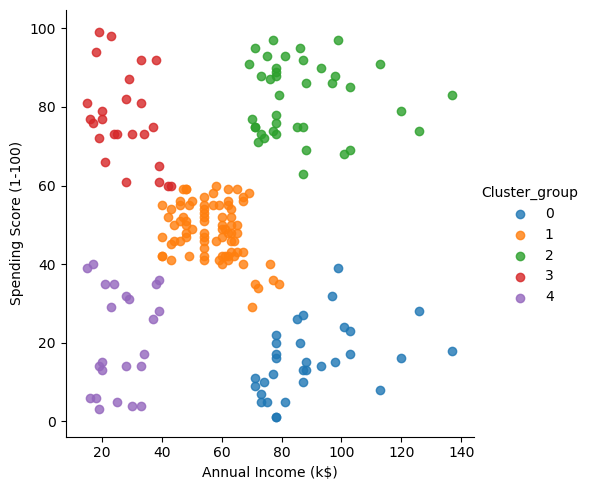

In [20]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                  fit_reg=False, legend=True, legend_out=True)

# Hue is for COLOR Differentiation